# 第三章 模型搭建和评估--建模

In [1]:
# 载入所需的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (10, 6)  # 设置输出图片大小

In [4]:
train = pd.read_csv('train.csv')
data = pd.read_csv('clear_data.csv')
#原始数据、清洗后的数据

In [5]:
train.shape,data.shape

((891, 12), (891, 11))

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,2,3,26.0,0,0,7.9250,1,0,0,0,1
3,3,1,35.0,1,0,53.1000,1,0,0,0,1
4,4,3,35.0,0,0,8.0500,0,1,0,0,1


clear数据无Survived、Name、Ticket、Cabin参数，并将Sex和Embarked参数进行one-hot编码表示

## 模型搭建
### 处理完前面的数据我们就得到建模数据，下一步是选择合适模型:

#### 1.在进行模型选择之前我们需要先知道数据集最终是进行监督学习还是无监督学习
    (1)监督学习（supervised learning）的任务是学习一个模型，使模型能够对任意给定的输入，对其相应的输出做出一个好的预测。即：利用训练数据集学习一个模型，再用模型对测试样本集进行预测。分类问题（离散）与回归问题（连续）等都是监督学习。
    (2)非监督学习（unsupervised learning）为直接对数据进行建模。没有给定事先标记过的训练范例，所用的数据没有属性或标签这一概念。事先不知道输入数据对应的输出结果是什么。自动对输入的资料进行分类或分群，以寻找数据的模型和规律。例如聚类算法。
    (3)有无预期输出是监督学习（supervised learning）与非监督学习（unsupervised learning）的区别。

#### 2.模型的选择一方面是通过我们的任务来决定的；除了根据我们任务来选择模型外，还可以根据数据样本量以及特征的稀疏性来决定
#### 3.刚开始我们总是先尝试使用一个基本的模型来作为其baseline，进而再训练其他模型做对比，最终选择泛化能力或性能比较好的模型

## 任务一：切割训练集和测试集
## 这里使用留出法划分数据集

In [8]:
train_test_split?

Object `train_test_split` not found.


##### train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,随机种子，实现结果复现
    shuffle=True,是否打乱顺序
    stratify=None,
    （stratify=y : 按照数据集中y的比例分配给train和test，使得train和test中各类别数据的比例与原数据集的比例一致。）
)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# 一般先取出X和y后再切割，有些情况会使用到未切割的，这时候X和y就可以用,x是清洗好的数据，y是我们要预测的存活数据'Survived'
X = data
y = train['Survived']
# 对数据集进行切割
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=40)

# 查看数据形状
X_train.shape, X_test.shape

((668, 11), (223, 11))

## 任务二：模型创建
  创建基于线性模型的分类模型（逻辑回归）
  创建基于树的分类模型（决策树、随机森林）
  分别使用这些模型进行训练，分别的到训练集和测试集的得分
  查看模型的参数，并更改参数值，观察模型变化

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### 逻辑回归参数：
class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

参数penalty正则化参数的主要作用是防止过拟合，对模型添加正则化项可以限制模型的复杂度，使得模型在复杂度和性能达到平衡。常用的正则化方法有L1正则化和L2正则化。 L1正则化和L2正则化可以看做是损失函数的惩罚项。

In [12]:
# 逻辑回归模型
lr = LogisticRegression()#创建模型（先默认参数）
lr.fit(X_train, y_train)#进行训练

G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
print('逻辑回归训练集得分：{:.4f}'.format(lr.score(X_train,y_train)))
print('逻辑回归测试集得分：{:.4f}'.format(lr.score(X_test,y_test)))

逻辑回归训练集得分：0.7874
逻辑回归测试集得分：0.8027


In [14]:
lr2 = LogisticRegression(C=91)
lr2.fit(X_train, y_train)

G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=91)

In [15]:
print('逻辑回归训练集得分：{:.4f}'.format(lr2.score(X_train,y_train)))
print('逻辑回归测试集得分：{:.4f}'.format(lr2.score(X_test,y_test)))

逻辑回归训练集得分：0.7829
逻辑回归测试集得分：0.8117


### 随机森林
class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

n_estimators：The number of trees in the forest.
max_depth：The maximum depth of the tree.

bootstrapbool：
Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

oob_scorebool：
Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.

In [16]:
# 随机森林分类模型
rfc = RandomForestClassifier().fit(X_train, y_train)

In [17]:
print("随机森林训练集得分: {:.4f}".format(rfc.score(X_train, y_train)))
print("随机森林测试集得分: {:.4f}".format(rfc.score(X_test, y_test)))

随机森林训练集得分: 1.0000
随机森林测试集得分: 0.8341


In [18]:
#调参
rfc2 = RandomForestClassifier(n_estimators=1000,max_depth=5,bootstrap=True).fit(X_train, y_train)

In [19]:
print("随机森林训练集得分: {:.4f}".format(rfc2.score(X_train, y_train)))
print("随机森林测试集得分: {:.4f}".format(rfc2.score(X_test, y_test)))

随机森林训练集得分: 0.8578
随机森林测试集得分: 0.8430


#### 思考

#### 为什么线性模型可以进行分类任务，背后是怎么的数学关系？
#### 对于多分类问题，线性模型是怎么进行分类的？

https://blog.csdn.net/robin_Xu_shuai/article/details/77246481?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522165821063316781790779717%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=165821063316781790779717&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-1-77246481-null-null.142^v32^experiment_2_v1,185^v2^control&utm_term=%E4%B8%BA%E4%BB%80%E4%B9%88%E7%BA%BF%E6%80%A7%E6%A8%A1%E5%9E%8B%E5%8F%AF%E4%BB%A5%E8%BF%9B%E8%A1%8C%E5%88%86%E7%B1%BB%E4%BB%BB%E5%8A%A1&spm=1018.2226.3001.4187

## 任务三：输出模型预测结果
输出模型预测分类标签
输出不同分类标签的预测概率

In [20]:
# 预测标签
pred = lr.predict(X_train)
pred[:100]

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
# 预测标签概率
pred_proba = lr.predict_proba(X_train)
pred_proba

array([[0.5762691 , 0.4237309 ],
       [0.22583919, 0.77416081],
       [0.90403541, 0.09596459],
       ...,
       [0.8543313 , 0.1456687 ],
       [0.08067083, 0.91932917],
       [0.89260828, 0.10739172]])

# 第三章 模型搭建和评估--评价

## 模型评估
为了知道模型的泛化能力。
交叉验证（cross-validation）是一种评估泛化性能的统计学方法，它比单次划分训练集和测试集的方法更加稳定、全面。最常用k折交叉验证。
https://blog.csdn.net/WHYbeHERE/article/details/108192957?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522165822195016781432982295%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=165822195016781432982295&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_positive~default-2-108192957-null-null.142^v32^experiment_2_v1,185^v2^control&utm_term=%E4%BA%A4%E5%8F%89%E9%AA%8C%E8%AF%81&spm=1018.2226.3001.4187

### 任务一：交叉验证
1.用10折交叉验证来评估之前的逻辑回归模型
2.计算交叉验证精度的平均值

In [22]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression(C=91)
scores = cross_val_score(lr, X_train, y_train, cv=10)
scores

G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

array([0.79104478, 0.71641791, 0.7761194 , 0.74626866, 0.73134328,
       0.80597015, 0.79104478, 0.7761194 , 0.75757576, 0.8030303 ])

## 任务二：混淆矩阵
计算二分类问题的混淆矩阵
计算精确率、召回率以及f-分数

### 混淆矩阵
在机器学习领域，混淆矩阵（Confusion Matrix），又称为可能性矩阵或错误矩阵。混淆矩阵是可视化工具，特别用于监督学习，在无监督学习一般叫做匹配矩阵。在图像精度评价中，主要用于比较分类结果和实际测得值，可以把分类结果的精度显示在一个混淆矩阵里面。
https://blog.csdn.net/seagal890/article/details/105059498?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522165824067216782388043209%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=165824067216782388043209&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_positive~default-1-105059498-null-null.142^v32^experiment_2_v1,185^v2^control&utm_term=%E6%B7%B7%E6%B7%86%E7%9F%A9%E9%98%B5&spm=1018.2226.3001.4187

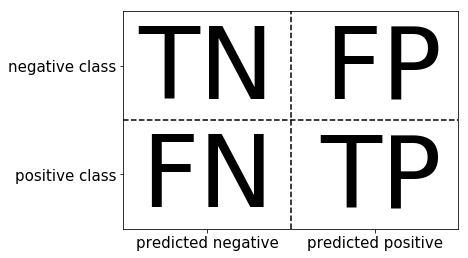

In [23]:
Image('Snipaste_2020-01-05_16-38-26.png')

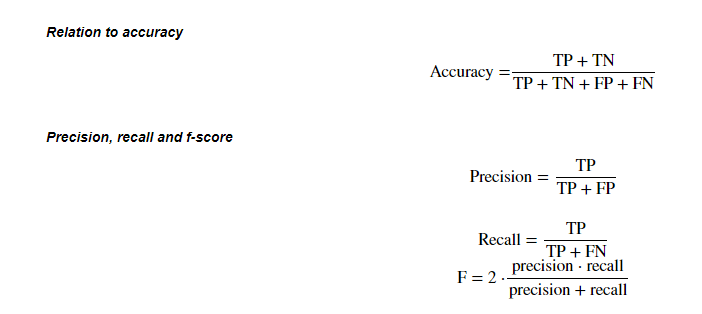

In [24]:
Image('Snipaste_2020-01-05_16-39-27.png')

In [25]:
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(C=100)
lr.fit(X_train, y_train)# 训练模型
# 模型预测结果
pred = lr.predict(X_train)
# 混淆矩阵
confusion_matrix(y_train, pred)

G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[363,  49],
       [ 86, 170]], dtype=int64)

## 分类指标
1.精确率（Accuracy）：精确率是最常用的分类性能指标。可以用来表示模型的精度，即模型识别正确的个数/样本的总个数。一般情况下，模型的精度越高，说明模型的效果越好。
Accuracy = (TP+TN)/(TP+FN+FP+TN)

2.正确率或者准确率（Precision）：又称为查准率，表示在模型识别为正类的样本中，真正为正类的样本所占的比例。一般情况下，查准率越高，说明模型的效果越好。
Precision = TP/(TP+FP)

3.召回率（Recall）：又称为查全率，召回率表现出在实际正样本中，分类器能预测出多少。
Recall（召回率） = Sensitivity（敏感指标，True Positive Rate，TPR）= 查全率。表示的是，模型正确识别出为正类的样本的数量占总的正类样本数量的比值。一般情况下，Recall越高，说明有更多的正类样本被模型预测正确，模型的效果越好。
Recall = TP/(TP+FN)

4.F1_Score：数学定义为 F1分数（F1-Score），又称为平衡 F分数（Balanced Score），它被定义为正确率和召回率的调和平均数。

In [26]:
from sklearn.metrics import classification_report
# 精确率、召回率以及F1-score
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       412
           1       0.78      0.66      0.72       256

    accuracy                           0.80       668
   macro avg       0.79      0.77      0.78       668
weighted avg       0.80      0.80      0.79       668



注意：不要使用小数作为类别

## 任务三：ROC曲线
绘制ROC曲线

1.什么是ROC曲线？
概念：ROC的全称是“受试者工作特征”（Receiver Operating Characteristic）曲线，首先是由二战中的电子工程师和雷达工程师发明的，用来侦测战场上的敌军载具（飞机、船舰），也就是信号检测理论。之后很快就被引入了心理学来进行信号的知觉检测。此后被引入机器学习领域，用来评判分类、检测结果的好坏。因此，ROC曲线是非常重要和常见的统计分析方法。
在ROC曲线图中，每个点以对应的FPR值为横坐标，以TPR值为纵坐标
2. 利用ROC曲线评价模型性能——AUC(Area Under Curve)

————————————————
版权声明：本文为CSDN博主「忆殇DR」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/qq_30992103/article/details/99730059/

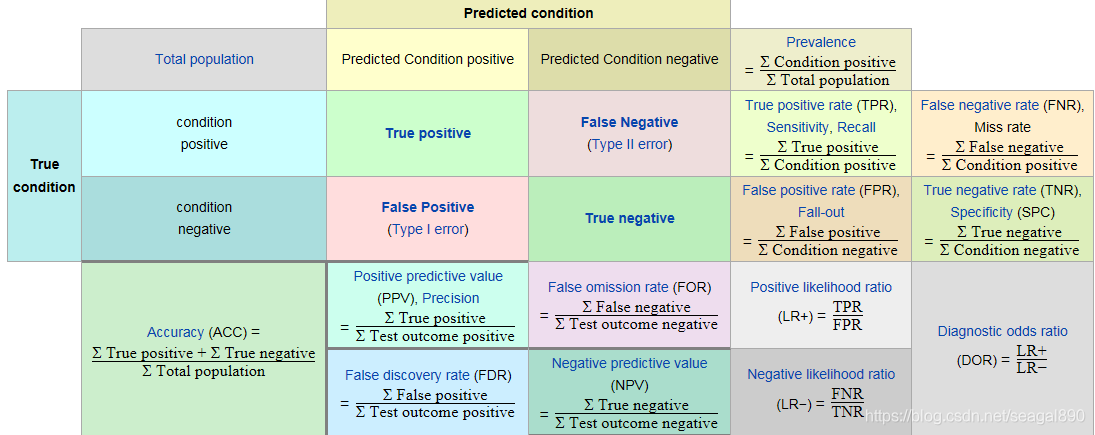

In [27]:
Image('20200323234646369.png')

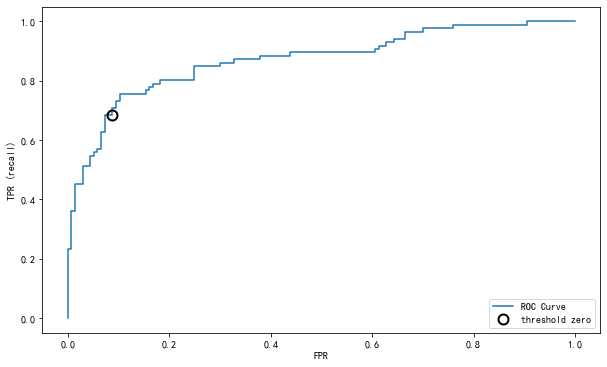

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# 找到最接近于0的阈值
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)